In [5]:
!dir

 Volume in drive D is Samip
 Volume Serial Number is 3A4B-753D

 Directory of d:\TessTutorial

09/17/2024  01:47 PM    <DIR>          .
08/29/2024  07:15 PM    <DIR>          datagentest
08/30/2024  09:24 PM             1,024 groundtruth.py
05/13/2024  03:07 PM           189,856 notice.jpg
08/29/2024  10:56 AM           642,324 NotoSansDevanagari-VariableFont_wdth,wght.ttf
09/14/2024  12:06 AM            44,743 ocrtest.ipynb
09/03/2024  04:05 PM            43,272 output.png
09/17/2024  01:47 PM            42,757 outputnew.png
09/02/2024  07:32 PM    <DIR>          tesseract_tutorial
08/29/2024  07:08 PM    <DIR>          test_images
09/22/2024  01:49 AM           826,555 train.ipynb
               7 File(s)      1,790,531 bytes
               4 Dir(s)   1,376,407,552 bytes free


In [6]:
import os
import subprocess

In [7]:
#switch to  tesstrain
%cd tesseract_tutorial/tesstrain
!dir

d:\TessTutorial\tesseract_tutorial\tesstrain
 Volume in drive D is Samip
 Volume Serial Number is 3A4B-753D

 Directory of d:\TessTutorial\tesseract_tutorial\tesstrain

09/17/2024  01:36 PM    <DIR>          .
09/02/2024  07:32 PM    <DIR>          ..
08/29/2024  11:20 AM    <DIR>          .github
08/29/2024  11:20 AM                28 .gitignore
08/29/2024  11:20 AM               264 .pylintrc
08/29/2024  11:20 AM             1,634 count_chars.py
09/22/2024  12:52 AM    <DIR>          data
09/22/2024  12:32 AM             1,542 generate_eval_train.py
08/29/2024  11:20 AM             1,095 generate_gt_from_box.py
08/29/2024  11:20 AM             1,527 generate_line_box.py
08/29/2024  11:20 AM             2,336 generate_line_syllable_box.py
08/29/2024  11:20 AM             1,316 generate_wordstr_box.py
08/29/2024  11:20 AM            10,349 LICENSE
09/03/2024  02:51 PM            17,852 Makefile
09/17/2024  01:36 PM            35,411 mintty.2024-09-17_13-36-49.png
09/03/2024  01:55 PM  

## FINE TUNING THE MODEL

Training is done through bash command

In [25]:
#Renaming file to avoid conflict in bash

def replace_brackets_in_filenames(folder_path):
    for filename in os.listdir(folder_path):
        new_filename = filename.replace('(', '_').replace(')', '_')
        # If filename has changed, rename the file
        if new_filename != filename:
            old_file_path = os.path.join(folder_path, filename)
            new_file_path = os.path.join(folder_path, new_filename)
            os.rename(old_file_path, new_file_path)
            print(f'Renamed: {old_file_path} -> {new_file_path}')

# Specify the folder path
folder_path = "data/nep-fuse-2-ground-truth"
replace_brackets_in_filenames(folder_path)


## Original Training Script

In [5]:


# Step 1: Set environment variables
os.environ['TESSDATA_PREFIX'] = r'..\tesseract\tessdata'
os.environ['GROUND_TRUTH_DIR'] = r'..\data\nep-new-ground-truth'

# Step 2: Prepend the desired directory to the PATH environment variable
git_bin_path = r'C:\Program Files\Git\usr\bin'
os.environ['PATH'] = git_bin_path + os.pathsep + os.environ['PATH']

# Step 3: Change the working directory to where the ground truth files are located
os.chdir(r'..\data\nep-fuse-2-ground-truth')

# Debug: Print the current working directory and list of files
print("Current working directory:", os.getcwd())
print("Files in the current directory:", os.listdir())

# Step 4: Verify the presence of ground truth files
ground_truth_files = [f for f in os.listdir() if f.endswith('.gt.txt')]
if not ground_truth_files:
    raise FileNotFoundError("No ground truth files (*.gt.txt) found in the directory.")

# Step 5: Change the working directory to the tesstrain folder
os.chdir(r'..\..\tesstrain')


Current working directory: d:\TessTutorial\tesseract_tutorial\data\nep-fuse-2-ground-truth
Files in the current directory: ['1(aug_1).gt.txt', '1(aug_1).png', '1(aug_2).gt.txt', '1(aug_2).png', '1.gt.txt', '1.png', '10(aug_1).gt.txt', '10(aug_1).png', '10(aug_2).gt.txt', '10(aug_2).png', '10.gt.txt', '10.png', '100(aug_1).gt.txt', '100(aug_1).png', '100(aug_2).gt.txt', '100(aug_2).png', '100.gt.txt', '100.png', '101(aug_1).gt.txt', '101(aug_1).png', '101(aug_2).gt.txt', '101(aug_2).png', '101.gt.txt', '101.png', '102(aug_1).gt.txt', '102(aug_1).png', '102(aug_2).gt.txt', '102(aug_2).png', '102.gt.txt', '102.png', '103(aug_1).gt.txt', '103(aug_1).png', '103(aug_2).gt.txt', '103(aug_2).png', '103.gt.txt', '103.png', '104(aug_1).gt.txt', '104(aug_1).png', '104(aug_2).gt.txt', '104(aug_2).png', '104.gt.txt', '104.png', '105(aug_1).gt.txt', '105(aug_1).png', '105(aug_2).gt.txt', '105(aug_2).png', '105.gt.txt', '105.png', '106(aug_1).gt.txt', '106(aug_1).png', '106(aug_2).gt.txt', '106(aug_2

In [6]:

# Step 6: Define the command
command = [
    'make', 'training',
    'MODEL_NAME=nep-fuse-2',
    'START_MODEL=nep',
    'TESSDATA=../tesseract/tessdata',
    'LEARNING_RATE=0.01',
    'LANG_TYPE=Indic',
    # 'FINE_TUNE_TYPE=Impact',
    'MAX_ITERATIONS=5000'
    # 'RATIO_TRAIN=0.8',
    # 'make plot MODEL_NAME=nep-fuse'
]

# Step 7: Run the command and print output in real-time
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, encoding='utf-8')

# Step 8: Print the output line by line
for line in process.stdout:
    print(line, end='')

# Step 9: Wait for the process to complete and get the return code
process.wait()
print(f"Process finished with return code {process.returncode}")

You are using make version: 4.4.1
unicharset_extractor --output_unicharset "data/nep-fuse-2/my.unicharset" --norm_mode 2 "data/nep-fuse-2/all-gt"
Extracting unicharset from plain text file data/nep-fuse-2/all-gt
Other case b of B is not in unicharset
Other case s of S is not in unicharset
Other case i of I is not in unicharset
Other case t of T is not in unicharset
Other case m of M is not in unicharset
Other case l of L is not in unicharset
Other case a of A is not in unicharset
Other case p of P is not in unicharset
Wrote unicharset file data/nep-fuse-2/my.unicharset
merge_unicharsets data/nep/nep-fuse-2.lstm-unicharset data/nep-fuse-2/my.unicharset "data/nep-fuse-2/unicharset"
Loaded unicharset of size 110 from file data/nep/nep-fuse-2.lstm-unicharset
Loaded unicharset of size 98 from file data/nep-fuse-2/my.unicharset
Wrote unicharset file data/nep-fuse-2/unicharset.
PYTHONIOENCODING=utf-8 python generate_wordstr_box.py -i "data/nep-fuse-2-ground-truth/100.png" -t "data/nep-fuse-2-

In [25]:
import subprocess

# Define the command to be executed with the LOG_FILE parameter
log_file_path = 'data/nep-new/training.log'  # Specify the path to the log file
command = ['make', 'evaluation', 'MODEL_NAME=nep-fuse-2']

output_lines=[]
# Run the command and print output in real-time
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, encoding='utf-8')

# Print the output line by line
for line in process.stdout:
    print(line, end='')
    output_lines.append(line)

# Wait for the process to complete and get the return code
process.wait()
print(f"Process finished with return code {process.returncode}")
output = ''.join(output_lines)
print(output)

1You are using make version: 4.4.1
lstmtraining \
          --stop_training \
          --continue_from data/nep-fuse-2/checkpoints/nep-fuse-2_14.085_540_700.checkpoint \
          --traineddata data/nep-fuse-2/nep-fuse-2.traineddata \
          --model_output data/nep-fuse-2/tessdata_best/nep-fuse-2_14.085_540_700.traineddata
Loaded file data/nep-fuse-2/checkpoints/nep-fuse-2_14.085_540_700.checkpoint, unpacking...
time -p lstmeval  \
	--verbosity=0 \
	--model data/nep-fuse-2/tessdata_best/nep-fuse-2_14.085_540_700.traineddata \
	--eval_listfile data/nep-fuse-2/list.eval 2>&1 | grep "^BCER eval" > data/nep-fuse-2/eval/nep-fuse-2_14.085_540_700.eval.log
make: *** [Makefile:359: data/nep-fuse-2/eval/nep-fuse-2_14.085_540_700.eval.log] Error 1



In [38]:
import subprocess
import re 

pattern = r'(time[\s\S]+?)(?=make)'

match = re.search(pattern,output)

if match:
    extracted_command = match.group(0)
    print("Extracted Command:")
    print(extracted_command)

    # Path to Git Bash
    git_bash_path = "C:/Program Files/Git/bin/bash.exe"

    # Run the command using subprocess
    try:
        process = subprocess.Popen([git_bash_path, '-c', extracted_command], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True, encoding='utf-8')

        # Print the output line by line
        for line in process.stdout:
            print(line, end='')

        # Print any errors
        for line in process.stderr:
            print(line, end='')

        # Wait for the process to complete and get the return code
        process.wait()
        print(f"Process finished with return code {process.returncode}")

    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Command not found in the output.")

Extracted Command:
time -p lstmeval  \
	--verbosity=0 \
	--model data/nep-fuse-2/tessdata_best/nep-fuse-2_14.085_540_700.traineddata \
	--eval_listfile data/nep-fuse-2/list.eval 2>&1 | grep "^BCER eval" > data/nep-fuse-2/eval/nep-fuse-2_14.085_540_700.eval.log

real 57.51
user 0.00
sys 0.00
Process finished with return code 0


In [39]:
#Automate the process

from IPython import get_ipython
counter = 23

# Define your cell content as strings
cell_1_code = """
# Define the command to be executed with the LOG_FILE parameter
log_file_path = 'data/nep-new/training.log'  # Specify the path to the log file
command = ['make', 'evaluation', 'MODEL_NAME=nep-fuse-2']

output_lines=[]
# Run the command and print output in real-time
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, encoding='utf-8')

# Print the output line by line
for line in process.stdout:
    print(line, end='')
    output_lines.append(line)

# Wait for the process to complete and get the return code
process.wait()
print(f"Process finished with return code {process.returncode}")
output = ''.join(output_lines)
"""

cell_2_code = """
pattern = r'(time[\s\S]+?)(?=make)'

match = re.search(pattern,output)

if match:
    extracted_command = match.group(0)
    print("Extracted Command:")
    print(extracted_command)

    # Path to Git Bash
    git_bash_path = "C:/Program Files/Git/bin/bash.exe"

    # Run the command using subprocess
    try:
        process = subprocess.Popen([git_bash_path, '-c', extracted_command], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True, encoding='utf-8')

        # Print the output line by line
        for line in process.stdout:
            print(line, end='')

        # Print any errors
        for line in process.stderr:
            print(line, end='')

        # Wait for the process to complete and get the return code
        process.wait()
        print(f"Process finished with return code {process.returncode}")

    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Command not found in the output.")
"""

# Get the current IPython instance
ipython = get_ipython()

# Loop to run these cells 5 times
for i in range(counter):
    print(f"Iteration {i+1}: Running cells")
    ipython.run_cell(cell_1_code)
    ipython.run_cell(cell_2_code)


Iteration 1: Running cells
You are using make version: 4.4.1
lstmtraining \
          --stop_training \
          --continue_from data/nep-fuse-2/checkpoints/nep-fuse-2_14.935_399_500.checkpoint \
          --traineddata data/nep-fuse-2/nep-fuse-2.traineddata \
          --model_output data/nep-fuse-2/tessdata_best/nep-fuse-2_14.935_399_500.traineddata
Loaded file data/nep-fuse-2/checkpoints/nep-fuse-2_14.935_399_500.checkpoint, unpacking...
time -p lstmeval  \
	--verbosity=0 \
	--model data/nep-fuse-2/tessdata_best/nep-fuse-2_14.935_399_500.traineddata \
	--eval_listfile data/nep-fuse-2/list.eval 2>&1 | grep "^BCER eval" > data/nep-fuse-2/eval/nep-fuse-2_14.935_399_500.eval.log
make: *** [Makefile:359: data/nep-fuse-2/eval/nep-fuse-2_14.935_399_500.eval.log] Error 1
Process finished with return code 2
Extracted Command:
time -p lstmeval  \
	--verbosity=0 \
	--model data/nep-fuse-2/tessdata_best/nep-fuse-2_14.935_399_500.traineddata \
	--eval_listfile data/nep-fuse-2/list.eval 2>&1 | g

### Training and Testing Error Plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

In [2]:
def read_training_error(log_file, metric):
    iterations = []
    errors = []
    with open(log_file, 'r') as file:
        for line in file:
            regex = rf'At iteration \d+/\d+/(\d+), .* {metric} train=([\d.]+)%'
            match = re.search(regex, line)
            if match:
                iterations.append(int(match.group(1)))
                errors.append(float(match.group(2)))
    return pd.DataFrame({'Iteration': iterations, 'Training Error': errors})

In [3]:
def read_testing_error(log_folder, metric):
    iterations = []
    errors = []
    for log_file in os.listdir(log_folder):
        if log_file.endswith('.eval.log'):
            iteration = int(re.search(r'_(\d+)\.eval\.log', log_file).group(1))
            with open(os.path.join(log_folder, log_file), 'r') as file:
                for line in file:
                    regex = rf'{metric} eval=([\d.]+)'
                    match = re.search(regex, line)
                    if match:
                        iterations.append(iteration)
                        errors.append(float(match.group(1)))
                        break
    return pd.DataFrame({'Iteration': iterations, 'Testing Error': errors})

In [8]:
training_cer = read_training_error('data/nep-fuse-2/training.log','BCER')
training_cer

,Iteration,Training Error
0,100,18.524
1,200,15.825
2,300,16.690
3,400,15.804
4,500,14.935
5,600,14.517
6,700,14.085
7,800,14.068
8,900,14.047
9,1000,13.376


In [9]:
testing_cer= read_testing_error('data/nep-fuse-2/eval','BCER')
testing_cer.sort_values(by='Iteration', inplace=True)
testing_cer.reset_index(drop=True, inplace=True)
testing_cer

,Iteration,Testing Error
0,100,10.142
1,200,9.834
2,500,8.660
3,700,8.502
4,1000,7.932
5,1100,7.800
6,1300,7.425
7,1400,7.676
8,1600,7.789
9,1800,7.513


In [10]:
data = pd.merge(training_cer, testing_cer, on='Iteration', how='inner').sort_values(by='Iteration')
data

,Iteration,Training Error,Testing Error
0,100,18.524,10.142
1,200,15.825,9.834
2,500,14.935,8.660
3,700,14.085,8.502
4,1000,13.376,7.932
5,1100,12.698,7.800
6,1300,11.078,7.425
7,1400,10.624,7.676
8,1600,9.763,7.789
9,1800,8.856,7.513


C:\Users\lamsa\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


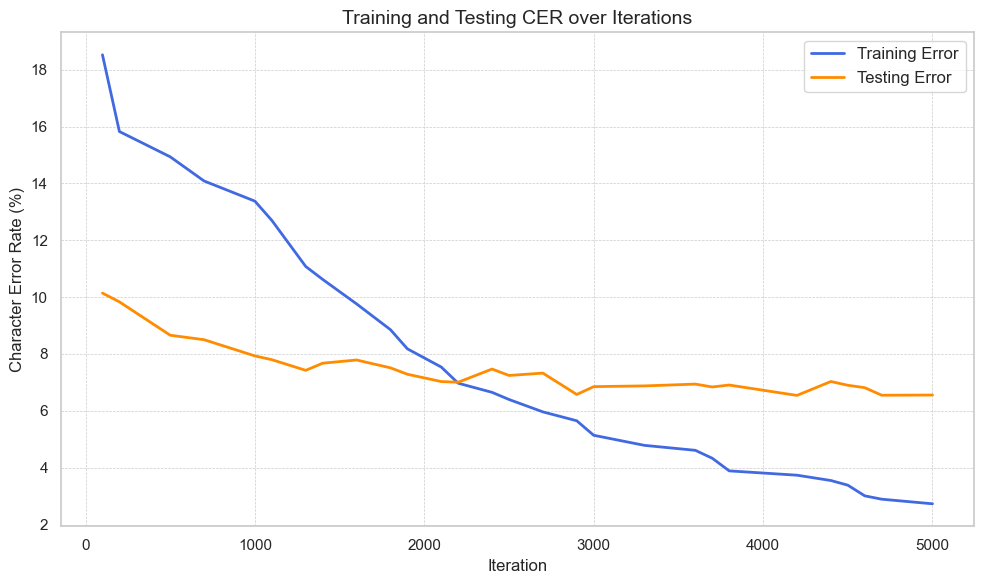

In [11]:

import seaborn as sns

filtered_data=data

# Set seaborn style for a cleaner look
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))  # Slightly wider figure for better readability

# Plot training and testing error with thicker lines and custom colors
plt.plot(filtered_data['Iteration'], filtered_data['Training Error'], label='Training Error', color='royalblue', linewidth=2)
plt.plot(filtered_data['Iteration'], filtered_data['Testing Error'], label='Testing Error', color='darkorange', linewidth=2)

# Labels and title
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Character Error Rate (%)', fontsize=12)
plt.title('Training and Testing CER over Iterations', fontsize=14)

# Legend with improved font size
plt.legend(fontsize=12)

# Grid lines with a light touch
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ensure a clean layout
plt.tight_layout()

# Display the plot
plt.show()


In [12]:
training_wer = read_training_error('data/nep-fuse-2/training.log','BWER')
training_wer.head()

,Iteration,Training Error
0,100,41.873
1,200,38.373
2,300,40.957
3,400,40.424
4,500,39.006


In [13]:
testing_wer= read_testing_error('data/nep-fuse-2/eval','BWER')
testing_wer.sort_values(by='Iteration', inplace=True)
testing_wer.reset_index(drop=True, inplace=True)
testing_wer.head()

,Iteration,Testing Error
0,100,23.800
1,200,24.037
2,500,20.899
3,700,21.110
4,1000,18.903


In [15]:
word_data = pd.merge(training_wer, testing_wer, on='Iteration', how='inner').sort_values(by='Iteration')
word_data

,Iteration,Training Error,Testing Error
0,100,41.873,23.800
1,200,38.373,24.037
2,500,39.006,20.899
3,700,36.793,21.110
4,1000,34.636,18.903
5,1100,33.343,19.396
6,1300,30.452,18.369
7,1400,28.913,18.749
8,1600,26.314,18.963
9,1800,23.622,17.793


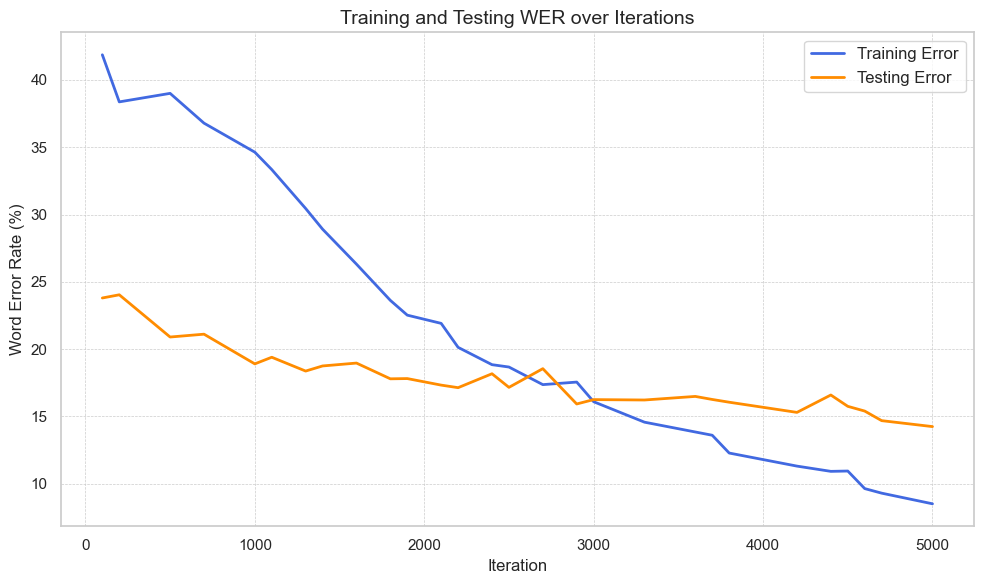

In [16]:
filtered_data=word_data

# Set seaborn style for a cleaner look
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))  # Slightly wider figure for better readability

# Plot training and testing error with thicker lines and custom colors
plt.plot(filtered_data['Iteration'], filtered_data['Training Error'], label='Training Error', color='royalblue', linewidth=2)
plt.plot(filtered_data['Iteration'], filtered_data['Testing Error'], label='Testing Error', color='darkorange', linewidth=2)

# Labels and title
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Word Error Rate (%)', fontsize=12)
plt.title('Training and Testing WER over Iterations', fontsize=14)

# Legend with improved font size
plt.legend(fontsize=12)

# Grid lines with a light touch
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ensure a clean layout
plt.tight_layout()

# Display the plot
plt.show()

In [8]:
# CHECK DATA LEAKAGE
import re

def extract_numbers_from_file(file_path):
    # Regular expression to extract the number
    regex = r'(?<=/)\d+(?=_|\.)'
    
    # List to store extracted numbers
    extracted_numbers = []
    
    # Open the file and read line by line
    with open(file_path, 'r') as file:
        for line in file:
            # Apply the regex to extract the number
            match = re.search(regex, line)
            if match:
                extracted_numbers.append(match.group())
    
    return extracted_numbers

# Example usage
file_path_train = r'D:\TessTutorial\tesseract_tutorial\tesstrain\data\nep-fuse-2\list.train'
file_path_test = r'D:\TessTutorial\tesseract_tutorial\tesstrain\data\nep-fuse-2\list.eval'
numbers_train = extract_numbers_from_file(file_path_train)
numbers_eval= extract_numbers_from_file(file_path_test)

# print(f"Training set: {len(numbers_train)} numbers extracted.")
print(f"Testing data: {len(numbers_eval)} numbers extracted.")

set_train = set(numbers_train)
set_eval = set(numbers_eval)
print(f"Training set: {len(set_train)} unique numbers extracted.")
print(f"Testing set: {len(set_eval)} unique numbers extracted.")
print(set_eval)
#calculate difference
difference_set= set_eval.difference(set_train)
print(difference_set)
print(f"Data leakage: {len(difference_set)} unique numbers found in the testing set but not in the training set.")



Testing data: 225 numbers extracted.
Training set: 749 unique numbers extracted.
Testing set: 210 unique numbers extracted.
{'696', '21', '386', '362', '449', '426', '658', '288', '688', '540', '224', '119', '3', '310', '687', '458', '84', '321', '193', '511', '213', '553', '403', '691', '73', '574', '829', '341', '318', '845', '35', '387', '290', '121', '560', '371', '345', '436', '651', '18', '380', '510', '165', '833', '277', '683', '130', '300', '635', '8', '306', '89', '454', '369', '352', '647', '331', '636', '19', '864', '538', '548', '570', '810', '107', '477', '439', '617', '308', '148', '178', '338', '252', '508', '357', '809', '601', '340', '184', '296', '137', '839', '160', '450', '620', '804', '607', '97', '266', '140', '597', '486', '417', '47', '465', '281', '23', '442', '559', '418', '823', '612', '201', '404', '468', '376', '181', '421', '240', '304', '492', '657', '297', '348', '246', '861', '444', '628', '515', '422', '586', '565', '466', '114', '366', '289', '103', 

In [2]:
#manual split train eval

import os
import random
import shutil
import re

def move_random_files(data_folder, target_folder, percentage=0.25):
    # Ensure the target folder exists
    os.makedirs(target_folder, exist_ok=True)
    
    # Get all unique base identifiers (without extensions and augmentation)
    base_identifiers = set()
    pattern = re.compile(r'(\d+)(_aug_\d+)?')
    
    for filename in os.listdir(data_folder):
        if filename.endswith(('.gt', '.lstmf', '.png')):
            match = pattern.match(os.path.splitext(filename)[0])
            if match:
                base_identifiers.add(match.group(1))
    
    # Convert set to list and shuffle
    base_identifiers = list(base_identifiers)
    random.shuffle(base_identifiers)
    
    # Calculate the number of base identifiers to move
    num_files_to_move = int(len(base_identifiers) * percentage)
    
    # Select 25% of the base identifiers
    selected_base_identifiers = base_identifiers[:num_files_to_move]
    
    # Move the selected files
    for base_id in selected_base_identifiers:
        for filename in os.listdir(data_folder):
            if filename.startswith(base_id) and filename.endswith(('.gt', '.lstmf', '.png')):
                src_file = os.path.join(data_folder, filename)
                shutil.move(src_file, os.path.join(target_folder, filename))
    
    print(f"Moved {num_files_to_move} sets of files to {target_folder}")

# Example usage
data_folder = r'D:\TessTutorial\tesseract_tutorial\tesstrain\data\nep-fuse-2-ground-truth'
target_folder = r'D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata'
move_random_files(data_folder, target_folder)

Moved 187 sets of files to D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata


In [11]:
#identify and remove augmented data from test set
import os
import shutil
import re

def move_augmented_files(data_folder, target_folder):
    # Ensure the target folder exists
    os.makedirs(target_folder, exist_ok=True)
    
    # Regular expression pattern to identify augmented files with an optional underscore at the end
    pattern = re.compile(r'\d+_aug_\d+_?')
    
    # Loop through the files in the data folder
    for filename in os.listdir(data_folder):
        print(f"Checking file: {filename}")  # Debug information
        if pattern.search(filename) and filename.endswith(('.gt', '.lstmf', '.png')):
            print(f"Matched file: {filename}")  # Debug information
            src_file = os.path.join(data_folder, filename)
            dest_file = os.path.join(target_folder, filename)
            print(f"Moving file: {src_file} to {dest_file}")  # Debug information
            try:
                shutil.move(src_file, dest_file)
            except Exception as e:
                print(f"Error moving file {src_file}: {e}")
    
    print(f"Moved augmented files to {target_folder}")

# Example usage
data_folder = r'D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata'
target_folder = r'D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata\augmented'
move_augmented_files(data_folder, target_folder)

Checking file: 100.lstmf
Checking file: 100.png
Checking file: 100_aug_1_.lstmf
Matched file: 100_aug_1_.lstmf
Moving file: D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata\100_aug_1_.lstmf to D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata\augmented\100_aug_1_.lstmf
Checking file: 100_aug_1_.png
Matched file: 100_aug_1_.png
Moving file: D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata\100_aug_1_.png to D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata\augmented\100_aug_1_.png
Checking file: 100_aug_2_.lstmf
Matched file: 100_aug_2_.lstmf
Moving file: D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata\100_aug_2_.lstmf to D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata\augmented\100_aug_2_.lstmf
Checking file: 100_aug_2_.png
Matched file: 100_aug_2_.png
Moving file: D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata\100_aug_2_.png to D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata\augmented\100_aug_2_.png
Chec

In [21]:
#create list.eval and list.train manually
import os

def create_list_file(folder, output_file, base_path='data/nep-fuse-2-ground-truth'):
    with open(output_file, 'w') as f:
        for filename in os.listdir(folder):
            if filename.endswith('.lstmf'):
                file_path = os.path.join(base_path, filename)
                f.write(file_path + '\n')
    print(f"Created {output_file} with paths from {folder}")

# Example usage
train_folder = r'D:\TessTutorial\tesseract_tutorial\tesstrain\data\nep-fuse-2-ground-truth'
test_folder = r'D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata'
create_list_file(train_folder, 'D:/TessTutorial/tesseract_tutorial/tesstrain/data/testdata/list.train')
create_list_file(test_folder, 'D:/TessTutorial/tesseract_tutorial/tesstrain/data/testdata/list.eval')


Created D:/TessTutorial/tesseract_tutorial/tesstrain/data/testdata/list.train with paths from D:\TessTutorial\tesseract_tutorial\tesstrain\data\nep-fuse-2-ground-truth
Created D:/TessTutorial/tesseract_tutorial/tesstrain/data/testdata/list.eval with paths from D:\TessTutorial\tesseract_tutorial\tesstrain\data\testdata
